In [1]:
import altair as alt
import numpy as np
import pandas as pd


pd.set_option('display.max_columns', None)
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Get health data

In [2]:
df = pd.read_csv("../data/WHO_life_expectancy_data_clean.csv")

In [3]:
df.head()

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Make histogram

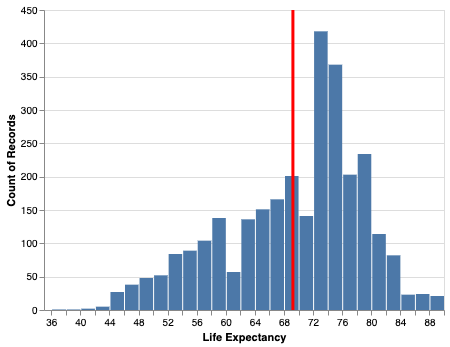

In [4]:
base = alt.Chart(df)

bar = base.mark_bar().encode(
    alt.X("life_expectancy:Q", bin=alt.Bin(step=2), title="Life Expectancy"),
    alt.Y('count()'),
    tooltip=[
            alt.Tooltip("count()", title="Numer of Records", format="0,")
        ]
)

rule = base.mark_rule(color="red").encode(
    alt.X("mean(life_expectancy):Q", title=None),
    size=alt.value(3),
    tooltip=[
            alt.Tooltip("mean(life_expectancy):Q", title="Mean Life Expectancy", format="0,.2f")
        ]
)

bar + rule